In [7]:
import pandas as pd

# Specify the path to your pickle file
pickle_file_path = r'C:\Users\david\Documents\master_thesis\data\Zwalm_data\preprocess_output\forcings_ERA5_david.pkl'

# Load the pickle file into a DataFrame
data = pd.read_pickle(pickle_file_path)

# Convert the 'Timestamp' column to datetime (if not already in datetime format)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Filter the data from 2012-01-01 until the end
data_filtered = data[data['Timestamp'] >= '2012-01-01']

# Display the first few rows of the filtered data
print(data_filtered.head())



       Timestamp  potential_evaporation_sum  total_precipitation_sum
14428 2012-01-01                       0.84                     7.41
14429 2012-01-02                       1.54                     4.32
14430 2012-01-03                       3.72                     3.98
14431 2012-01-04                       3.96                     3.10
14432 2012-01-05                       4.32                    11.74


In [8]:
import pandas as pd

# Specify the paths to the pickle files
ep_file_path = r'C:\Users\david\Documents\master_thesis\data\Zwalm_data\preprocess_output\ep_thiessen_daily.pkl' 
p_file_path = r'C:\Users\david\Documents\master_thesis\data\Zwalm_data\preprocess_output\p_thiessen_daily.pkl'

# Read the pickle files into DataFrames
ep_data = pd.read_pickle(ep_file_path)
p_data = pd.read_pickle(p_file_path)

# Ensure 'Timestamp' is in datetime format
ep_data['Timestamp'] = pd.to_datetime(ep_data['Timestamp'])
p_data['Timestamp'] = pd.to_datetime(p_data['Timestamp'])

# Merge the 'P_thiessen' and 'EP_thiessen' columns into the filtered data (on 'Timestamp')
data_filtered = data_filtered.merge(ep_data[['Timestamp', 'EP_thiessen']], on='Timestamp', how='left')
data_filtered = data_filtered.merge(p_data[['Timestamp', 'P_thiessen']], on='Timestamp', how='left')

# Display the updated DataFrame
print(data_filtered.to_string(index=False))

# Optionally, save the updated data to a new pickle file
updated_pickle_file_path = r'C:\Users\david\Documents\master_thesis\data\Zwalm_data\preprocess_output\data_filtered_with_forcings.pkl'
data_filtered.to_pickle(updated_pickle_file_path)

print(f"Updated data has been saved to: {updated_pickle_file_path}")


 Timestamp  potential_evaporation_sum  total_precipitation_sum  EP_thiessen  P_thiessen
2012-01-01                       0.84                     7.41     0.069985    4.455689
2012-01-02                       1.54                     4.32     0.107131    5.964984
2012-01-03                       3.72                     3.98     0.304218    7.740356
2012-01-04                       3.96                     3.10     0.744225    6.037671
2012-01-05                       4.32                    11.74     1.009941   13.135637
2012-01-06                       3.09                     0.46     0.709970    0.261521
2012-01-07                       2.29                     1.65     0.434233    3.899495
2012-01-08                       1.40                     0.61     0.331386    0.232681
2012-01-09                       0.93                     0.33     0.231416    0.621686
2012-01-10                       0.25                     0.16     0.112847    0.000000
2012-01-11                      

Mean of potential_evaporation_sum: 3.8646764559482327
Mean of EP_thiessen: 1.523202497497216


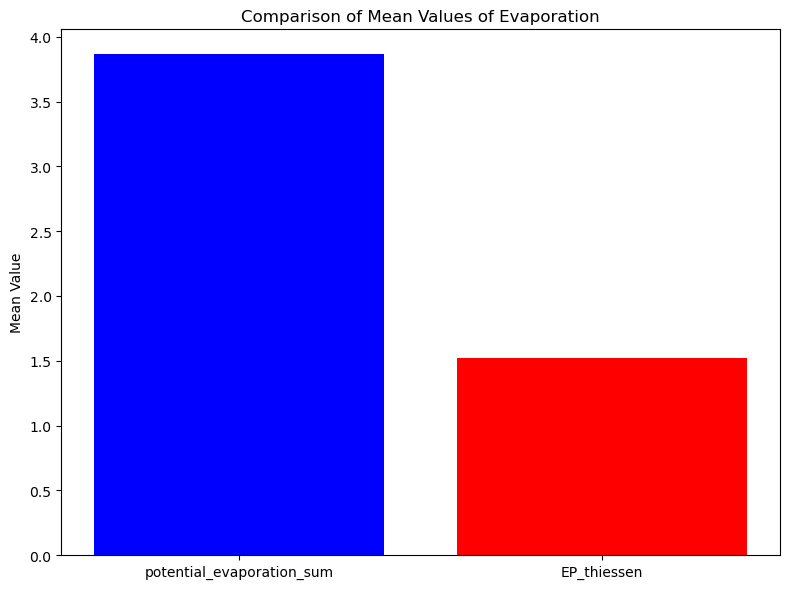

In [9]:
# Calculate the mean of 'potential_evaporation_sum' and 'EP_thiessen'
mean_potential_evaporation_sum = data_filtered['potential_evaporation_sum'].mean()
mean_EP_thiessen = data_filtered['EP_thiessen'].mean()

# Print the mean values
print(f"Mean of potential_evaporation_sum: {mean_potential_evaporation_sum}")
print(f"Mean of EP_thiessen: {mean_EP_thiessen}")

# Optionally, plot the means as a bar chart for comparison
import matplotlib.pyplot as plt

# Plotting the mean values
plt.figure(figsize=(8, 6))
plt.bar(['potential_evaporation_sum', 'EP_thiessen'], 
        [mean_potential_evaporation_sum, mean_EP_thiessen], 
        color=['blue', 'red'])

# Add labels and title
plt.ylabel('Mean Value')
plt.title('Comparison of Mean Values of Evaporation')

# Display the plot
plt.tight_layout()
plt.show()


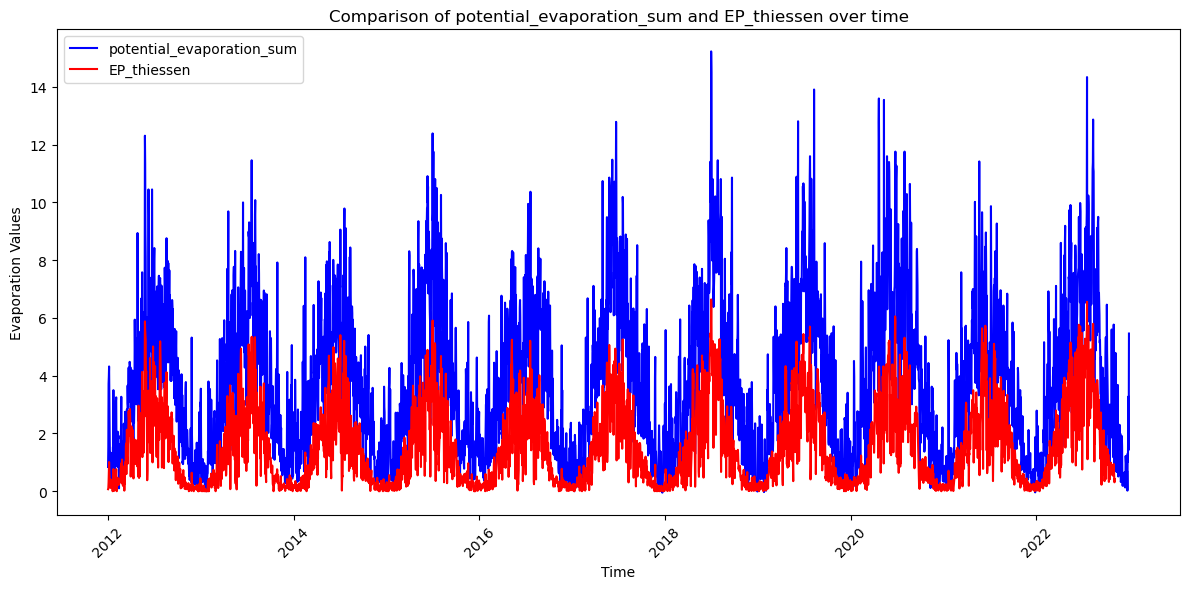

In [3]:
import matplotlib.pyplot as plt

# Ensure that 'Timestamp' is in datetime format
data_filtered['Timestamp'] = pd.to_datetime(data_filtered['Timestamp'])

# Plot the data
plt.figure(figsize=(12, 6))

# Plot 'potential_evaporation_sum' over time
plt.plot(data_filtered['Timestamp'], data_filtered['potential_evaporation_sum'], label='potential_evaporation_sum', color='blue')

# Plot 'EP_thiessen' over time
plt.plot(data_filtered['Timestamp'], data_filtered['EP_thiessen'], label='EP_thiessen', color='red')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Evaporation Values')
plt.title('Comparison of potential_evaporation_sum and EP_thiessen over time')

# Add a legend
plt.legend()

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Mean of total_precipitation_sum: 2.202068193130911
Mean of P_thiessen: 2.1280450968985027


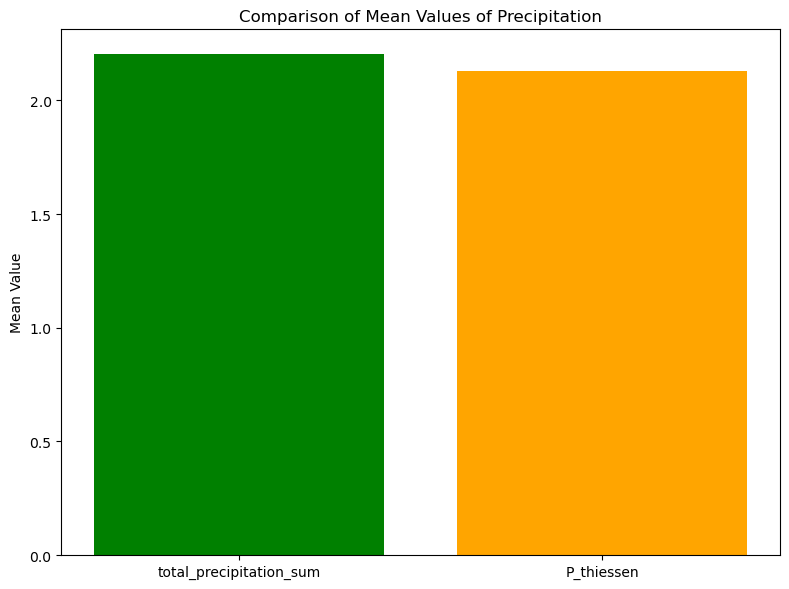

In [5]:
# Calculate the mean of 'total_precipitation_sum' and 'P_thiessen'
mean_total_precipitation_sum = data_filtered['total_precipitation_sum'].mean()
mean_P_thiessen = data_filtered['P_thiessen'].mean()

# Print the mean values
print(f"Mean of total_precipitation_sum: {mean_total_precipitation_sum}")
print(f"Mean of P_thiessen: {mean_P_thiessen}")

# Optionally, plot the means as a bar chart for comparison
import matplotlib.pyplot as plt

# Plotting the mean values
plt.figure(figsize=(8, 6))
plt.bar(['total_precipitation_sum', 'P_thiessen'], 
        [mean_total_precipitation_sum, mean_P_thiessen], 
        color=['green', 'orange'])

# Add labels and title
plt.ylabel('Mean Value')
plt.title('Comparison of Mean Values of Precipitation')

# Display the plot
plt.tight_layout()
plt.show()



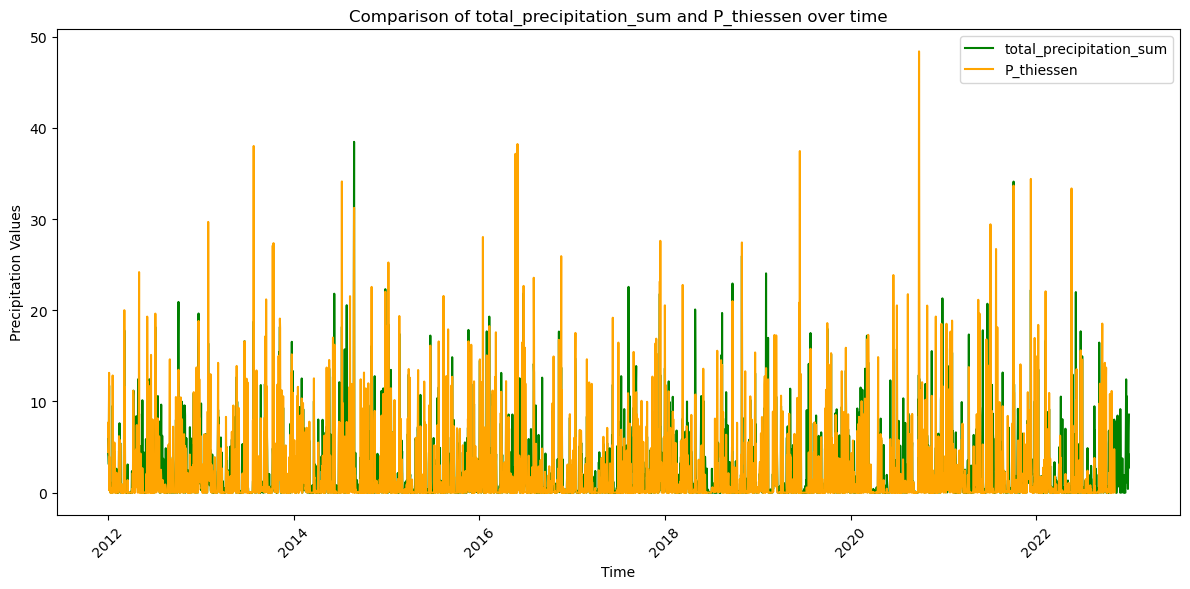

In [6]:
import matplotlib.pyplot as plt

# Ensure that 'Timestamp' is in datetime format
data_filtered['Timestamp'] = pd.to_datetime(data_filtered['Timestamp'])

# Plot the data
plt.figure(figsize=(12, 6))

# Plot 'total_precipitation_sum' over time
plt.plot(data_filtered['Timestamp'], data_filtered['total_precipitation_sum'], label='total_precipitation_sum', color='green')

# Plot 'P_thiessen' over time
plt.plot(data_filtered['Timestamp'], data_filtered['P_thiessen'], label='P_thiessen', color='orange')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Precipitation Values')
plt.title('Comparison of total_precipitation_sum and P_thiessen over time')

# Add a legend
plt.legend()

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
